# Question 1

In [1]:
#Import the necessary libraries

import requests
import pandas as pd
import numpy as np

download_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
target_csv_path = "users.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)


In [2]:
#Assign it to a variable called users

import requests
import pandas as pd
import numpy as np
users = pd.read_csv("users.csv", sep='|')
type(users)
users.head(100)


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
95,96,25,F,artist,75206
96,97,43,M,artist,98006
97,98,49,F,executive,90291
98,99,20,M,student,63129


In [4]:
# Discover what is the mean age per occupation
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [5]:
# Discover the Male ratio per occupation and sort it from the most to the least
df=users[(users["gender"] == "M")].groupby(["occupation"]).count()/users['occupation'].count()*100
df["gender"].sort_values(ascending = False)


occupation
student          14.422057
other             7.317073
educator          7.317073
engineer          6.892895
programmer        6.362672
administrator     4.559915
executive         3.075292
scientist         2.969247
technician        2.757158
writer            2.757158
librarian         2.332980
marketing         1.696713
entertainment     1.696713
artist            1.590668
retired           1.378579
lawyer            1.060445
salesman          0.954401
doctor            0.742312
none              0.530223
healthcare        0.530223
homemaker         0.106045
Name: gender, dtype: float64

In [6]:
#For each occupation, calculate the minimum and maximum ages
users.groupby('occupation').agg({'age':['min', 'max']})


age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [7]:
#For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender'])['age'].mean()




occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [8]:
#For each occupation present the percentage of women and men

users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

# Question 2

In [14]:
#Import the necessary libraries

import requests
import pandas as pd
import numpy as np

#Import the dataset & assign it to a variable called euro12
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head(100)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [15]:
#Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [16]:
#How many team participated in the Euro2012?
len(euro12.groupby('Team').groups)

16

In [17]:
#What is the number of columns in the dataset?
euro12.shape[1]

35

In [18]:
#View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
euro12[['Team', 'Yellow Cards', 'Red Cards']]

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [21]:
#Sort the teams by Red Cards, then to Yellow Cards

euro12.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17
11,Republic of Ireland,1,7,12,36.8%,5.2%,28,0,0,0,...,17,65.4%,43,51,11,6,1,10,10,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
14,Sweden,5,17,19,47.2%,13.8%,39,3,0,0,...,8,61.6%,35,51,7,7,0,9,9,18
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [23]:
#Calculate the mean Yellow Cards given per Team
euro12.groupby('Team').agg({'Yellow Cards': 'mean', 'Red Cards': 'mean'})

,Yellow Cards,Red Cards
Team,,
Croatia,9.0,0.0
Czech Republic,7.0,0.0
Denmark,4.0,0.0
England,5.0,0.0
France,6.0,0.0
Germany,4.0,0.0
Greece,9.0,1.0
Italy,16.0,0.0
Netherlands,5.0,0.0


In [24]:
#Filter teams that scored more than 6 goals
euro12[euro12.Goals>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [25]:
#Select the teams that start with G
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [32]:
#Select the first 7 columns
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [34]:
#Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [36]:
#Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [38]:
#Import the necessary libraries

import requests
import pandas as pd
import numpy as np



In [41]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000

Simul_a = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
Simul_b = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
Simul_c = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(Simul_a)
print(Simul_b)
print(Simul_c)



0     2
1     1
2     2
3     2
4     1
     ..
95    3
96    4
97    2
98    2
99    2
Length: 100, dtype: int32
0     2
1     2
2     1
3     1
4     1
     ..
95    2
96    3
97    3
98    3
99    1
Length: 100, dtype: int32
0     15753
1     11048
2     24129
3     12328
4     17335
      ...  
95    13512
96    15880
97    26398
98    29732
99    18724
Length: 100, dtype: int32


In [42]:
#Create a DataFrame by joinning the Series by column
pd.concat([Simul_a, Simul_b, Simul_c], axis=1)

,0,1,2
0,2,2,15753
1,1,2,11048
2,2,1,24129
3,2,1,12328
4,1,1,17335
...,...,...,...
95,3,2,13512
96,4,3,15880
97,2,3,26398
98,2,3,29732


In [46]:
#Change the name of the columns to bedrs, bathrs, price_sqr_meter
dbsimul = pd.concat([Simul_a, Simul_b, Simul_c], axis=1)
dbsimul.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
dbsimul.head(100)

,bedrs,bathrs,price_sqr_meter
0,2,2,15753
1,1,2,11048
2,2,1,24129
3,2,1,12328
4,1,1,17335
...,...,...,...
95,3,2,13512
96,4,3,15880
97,2,3,26398
98,2,3,29732


In [49]:
#Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([Simul_a, Simul_b, Simul_c], axis=0)
bigcolumn.head(300)

0         2
1         1
2         2
3         2
4         1
      ...  
95    13512
96    15880
97    26398
98    29732
99    18724
Length: 300, dtype: int32

In [50]:
#Ops it seems it is going only until index 99. Is it true?

#True. However is should have 300 (from 0 - 299). Once you concatenate 3 series of 100, it should have gone to index 299.
len(bigcolumn)


300

In [52]:
#Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn.head(300)


0          2
1          1
2          2
3          2
4          1
       ...  
295    13512
296    15880
297    26398
298    29732
299    18724
Length: 300, dtype: int32

# Question 4

In [14]:
#Step 1. Import the necessary libraries

import requests
import pandas as pd
import numpy as np
import datetime

In [15]:
#Step 2. Import the dataset from the attached file wind.txt
filename = 'wind.txt'
pd.read_csv(filename, sep="\s+")


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [16]:
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

pd.read_csv(filename, sep="\s+", parse_dates={'datetime':['Yr','Mo','Dy']})


,datetime,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [17]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

data = pd.read_csv(filename, sep="\s+", parse_dates={'datetime':['Yr','Mo','Dy']})

def fix(s):
    year=s.year-100 if s.year > 1979 else s.year
    
    return datetime.date(year,s.month,s.day)

data['datetime']=data['datetime'].apply(fix)
print(data)

        datetime    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0     1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1     1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2     1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3     1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   
4     1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569  1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59   
6570  1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25   
6571  1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46   
6572  1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87   
6573  1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63   

        MUL    CLO    BEL    MAL  
0     10.83  12.58  18.50  15.04  
1      9.79   9.6

In [18]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data.set_index(["datetime"],inplace=True)
print(data)

              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
datetime                                                                    
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04   
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25   
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50   
1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46   
1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58   

In [19]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [20]:
#Step 7. Compute how many non-missing values there are in total.
data.notna().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [21]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
data.mean().mean() 


10.227982360836924

In [22]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.

loc_stats=pd.DataFrame()
loc_stats['Min']=data.min(axis=0)
loc_stats['Max']=data.max(axis=0)
loc_stats['Mean']=data.mean(axis=0)
loc_stats['Standard_Deviations ']=data.std(axis=0)
print(loc_stats)


      Min    Max       Mean  Standard_Deviations 
RPT  0.67  35.80  12.362987              5.618413
VAL  0.21  33.37  10.644314              5.267356
ROS  1.50  33.84  11.660526              5.008450
KIL  0.00  28.46   6.306468              3.605811
SHA  0.13  37.54  10.455834              4.936125
BIR  0.00  26.16   7.092254              3.968683
DUB  0.00  30.37   9.797343              4.977555
CLA  0.00  31.08   8.495053              4.499449
MUL  0.00  25.88   8.493590              4.166872
CLO  0.04  28.21   8.707332              4.503954
BEL  0.13  42.38  13.121007              5.835037
MAL  0.67  42.54  15.599079              6.699794


In [23]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

day_stats=pd.DataFrame()
day_stats['Min']=data.min(axis=1)
day_stats['Max']=data.max(axis=1)
day_stats['Mean']=data.mean(axis=1)
day_stats['Standard_Deviations']=data.std(axis=1)
print(day_stats)

             Min    Max       Mean  Standard_Deviations
datetime                                               
1961-01-01  9.29  18.50  13.018182             2.808875
1961-01-02  6.50  17.54  11.336364             3.188994
1961-01-03  6.17  18.50  11.641818             3.681912
1961-01-04  1.79  11.75   6.619167             3.198126
1961-01-05  6.17  13.33  10.630000             2.445356
...          ...    ...        ...                  ...
1978-12-27  8.08  40.08  16.708333             7.868076
1978-12-28  5.00  41.46  15.150000             9.687857
1978-12-29  8.71  29.58  14.890000             5.756836
1978-12-30  9.13  28.79  15.367500             5.540437
1978-12-31  9.59  27.29  15.402500             5.702483

[6574 rows x 4 columns]


In [24]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
avg_ws_jan=data.query('month==1')
print(avg_ws_jan)
avg_ws_jan.loc[:,'RPT':'MAL'].mean()

              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
datetime                                                                    
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-01-27  18.54   9.59  15.67   6.42  10.34   7.04  11.63   9.38   9.46   
1978-01-28  35.38  29.88  18.00  15.96  26.92  15.67  15.87  26.34  15.04   
1978-01-29  29.38  18.54  28.08  17.12  17.50  13.75  25.54  15.67  18.08   
1978-01-30   9.62   8.71   9.59   2.71   7.58   3.54   6.08   6.08   5.33   
1978-01-31  10.50   8.79   9.54   4.42  10.58   5.46   8.00   5.71   6.50   

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [25]:
#Step 12. Downsample the record to a yearly frequency for each location.
data.asfreq('Y')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
datetime,,,,,,,,,,,,,,,,
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67,1961-12-31,12,1961,31
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63,1962-12-31,12,1962,31
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09,1963-12-31,12,1963,31
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58,1964-12-31,12,1964,31
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75,1965-12-31,12,1965,31
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46,1966-12-31,12,1966,31
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63,1967-12-31,12,1967,31
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42,1968-12-31,12,1968,31
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41,1969-12-31,12,1969,31


In [26]:
#Step 13. Downsample the record to a monthly frequency for each location.
data.asfreq('M')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
datetime,,,,,,,,,,,,,,,,
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92,1961-01-31,1,1961,31
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17,1961-02-28,2,1961,28
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21,1961-03-31,3,1961,31
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75,1961-04-30,4,1961,30
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63,1961-05-31,5,1961,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88,1978-08-31,8,1978,31
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88,1978-09-30,9,1978,30
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67,1978-10-31,10,1978,31


In [27]:
#Step 14. Downsample the record to a weekly frequency for each location.
data.asfreq('W')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
datetime,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46,1961-01-08,1,1961,8
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75,1961-01-15,1,1961,15
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92,1961-01-22,1,1961,22
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38,1961-01-29,1,1961,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75,1978-12-03,12,1978,3
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92,1978-12-10,12,1978,10
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08,1978-12-17,12,1978,17


In [34]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

??

# Question 5

In [64]:
#Step 1. Import the necessary libraries

import requests
import pandas as pd
import numpy as np



In [65]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.
#Step 4. See the first 10 entries

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
chipo.head(10)
    

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [66]:
#Step 5. What is the number of observations in the dataset?
chipo.shape

#4622 observations

(4622, 5)

In [67]:
#Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [68]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [69]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [70]:
#Step 9. Which was the most-ordered item? Chips and Fresh Tomato Salsa

chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).index[0]


'Chicken Bowl'

In [71]:
#Step 10. For the most-ordered item, how many items were ordered?
chipo[(chipo["item_name"] == 'Chicken Bowl')].groupby(['item_name']).quantity.sum()


item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [72]:
#Step 11. What was the most ordered item in the choice_description column?
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

'[Diet Coke]'

In [62]:
#Step 12. How many items were orderd in total?
chipo.quantity.sum()


4972

In [86]:
#Step 13.
#Turn the item price into a float
#Check the item price type 
#Create a lambda function and change the type of item price
#Check the item price type

???

Object `?` not found.


In [84]:
#Step 14. How much was the revenue for the period in the dataset?
chipo['revenue'] = chipo['quantity']*chipo.item_price
total_revenue = chipo.revenue.sum()
print(total_revenue)

39237.02


In [80]:
#Step 15. How many orders were made in the period?
chipo.order_id.nunique()

1834

In [81]:
#Step 16. What is the average revenue amount per order?
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [85]:
#Step 17. How many different items are sold?
chipo.item_name.nunique()

50

# Question 6

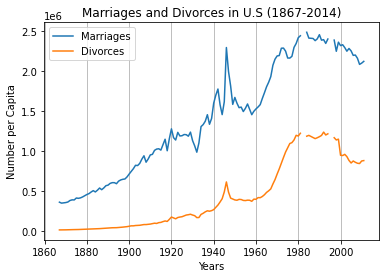

In [98]:

import pandas as pd
import matplotlib.pyplot as plt

filenamediv = 'us-marriages-divorces-1867-2014.csv'

datadivorce = pd.read_csv(filenamediv)


datadivorce.plot(x='Year', y=['Marriages', 'Divorces'])

# set plot title
plt.title('Marriages and Divorces in U.S (1867-2014)')

# set axis labels
plt.ylabel('Number per Capita')
plt.xlabel('Years')

# show grid line (optional)
plt.grid(axis='x')

# show plot
plt.show()

# Question 7

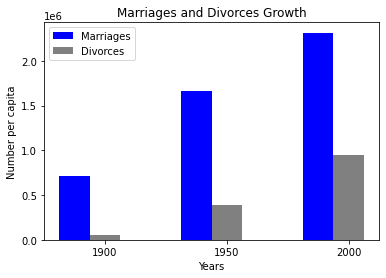

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

marriage = [709000, 1667000, 2315000]
divorce = [56000, 385000, 944000]

X = np.arange(len(marriage))
plt.bar(X, marriage, color = 'blue', width = 0.25)
plt.bar(X + 0.25, divorce, color = 'grey', width = 0.25)
plt.legend(['Marriages', 'Divorces'])
plt.xticks([i + 0.25 for i in range(3)], ['1900', '1950', '2000'])
plt.title("Marriages and Divorces Growth")
plt.xlabel('Years')
plt.ylabel('Number per capita')
plt.show()

# Question 8

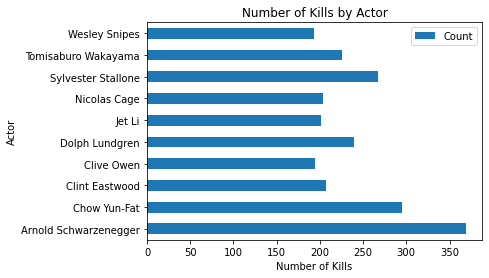

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filenamekill = 'actor_kill_counts.csv'

datakill = pd.read_csv(filenamekill)

datakill.plot.barh(x='Actor', y='Count')

plt.title("Number of Kills by Actor")
plt.ylabel('Actor')
plt.xlabel('Number of Kills')
plt.show()


# Thomas, I couldn't sort the order...:-(


# Question 9

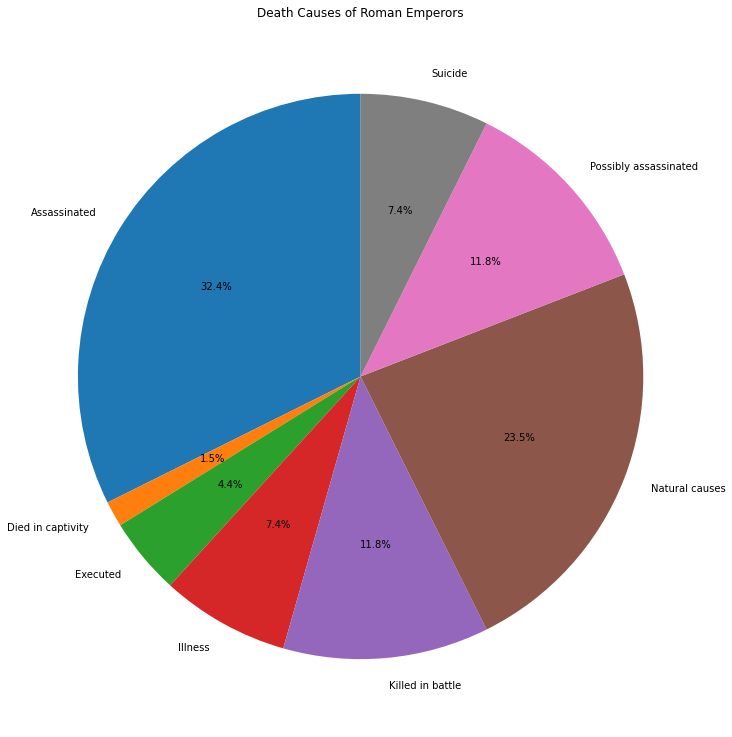

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


filenameroman = 'roman-emperor-reigns.csv'
data_romandeath = pd.read_csv(filenameroman)
data_romandeath.groupby(['Cause_of_Death']).count().plot(kind='pie', y='Emperor', legend = False, startangle=90,
figsize=(20,13), autopct='%1.1f%%', ylabel='')
plt.title("Death Causes of Roman Emperors")
plt.show()




# Question 10

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

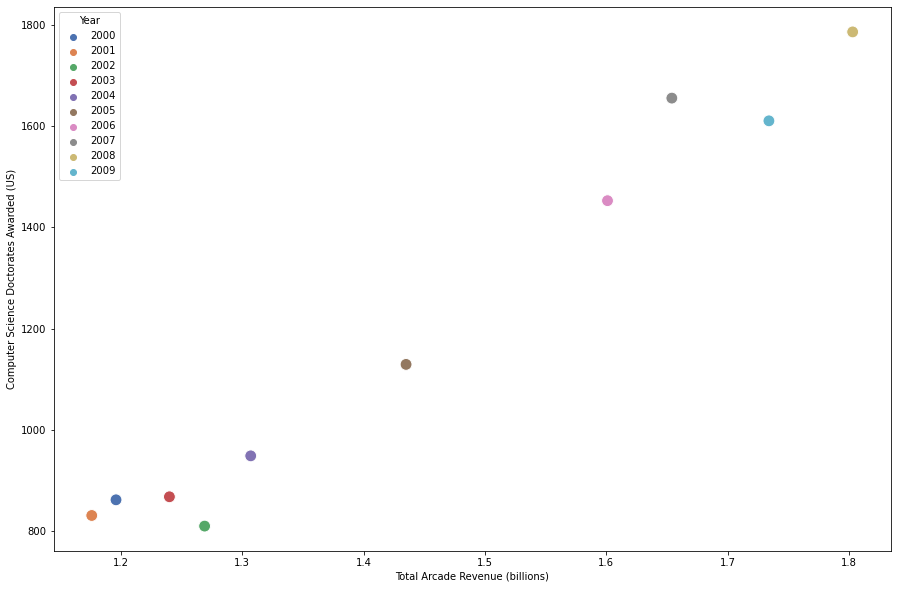

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

filearcade = 'arcade-revenue-vs-cs-doctorates.csv'
arcadevsPHD = pd.read_csv(filearcade)
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', s=140, data=arcadevsPHD, 
                 hue='Year', palette ='deep') 